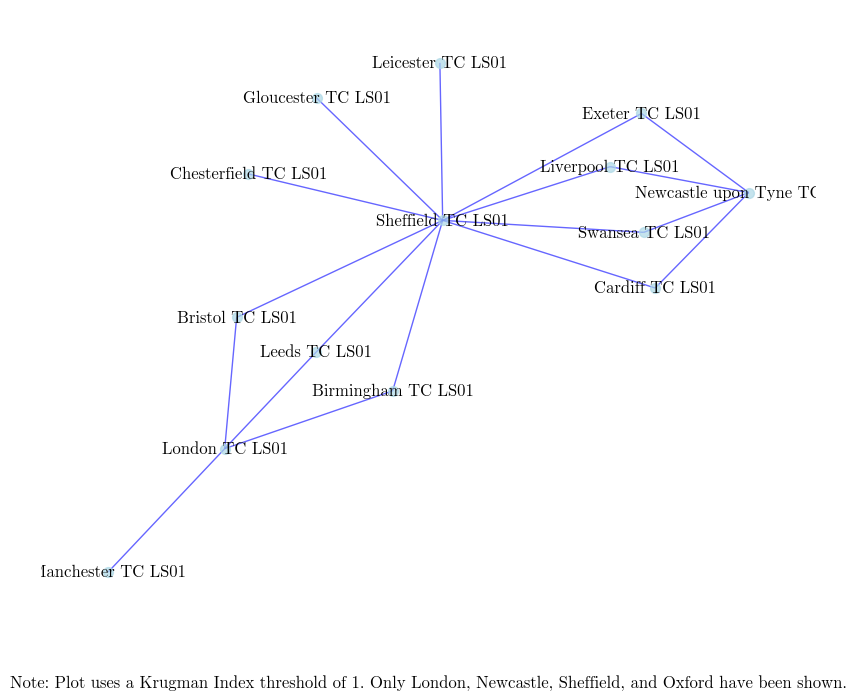

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Load the data
file_path = 'tckmatrixtool.xlsx'  
krugman_index_df = pd.read_excel(file_path, sheet_name="Krugman Index")

plt.rcParams.update({'font.family': 'CMU Serif'})

# Prepare the data
cleaned_df = krugman_index_df.iloc[1:, 2:]  # Assuming the first two rows and columns are not part of the data
nodes = cleaned_df.columns.tolist()
krugman_values = cleaned_df.replace('-', None).to_numpy().astype(float)

# Create the plot
G = nx.Graph()

# Specific towns/cities of interest
specific_towns = ["Newcastle upon Tyne TC LS01", "Sheffield TC LS01", "Oxford TC LS01", "London TC LS01"]

# Add edges based on the Krugman Index threshold of 1
for i, town1 in enumerate(nodes):
    for j, town2 in enumerate(nodes):
        if i < j and krugman_values[i, j] <0.5:
            if town1 in specific_towns or town2 in specific_towns:
                G.add_edge(town1, town2, weight=krugman_values[i, j])

# Draw the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=50)  

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1, edge_color='blue', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_family='CMU Serif', font_size=12) 

plt.title('', fontdict={'family': 'CMU Serif', 'size': 12})
plt.text(0.5, -0.1, 'Note: Plot uses a Krugman Index threshold of 1. Only London, Newcastle, Sheffield, and Oxford have been shown.', 
         ha='center', fontsize=12, family='CMU Serif', transform=plt.gca().transAxes)
plt.axis('off')
plt.show()
